 ##  [OOP II: Building Classes](https://lectures.quantecon.org/py/python_oop.html)
### 1 Overview
OOP has become an important concept in modern software engineering because  
- It can help facilitate clean, efficient code (if used well)
- The OOP design pattern fits well with many computing problems

### 2 About OOP
#### Key Concepts
In the OOP paradigm, data and functions are bundled together into “objects”  
An example is a Python list, which not only stores data, but also knows how to sort itself, etc.

In [1]:
x = [1, 5, 4]
x.sort()                             # 对 x 进行排序
x

[1, 4, 5]

#### Standard Terminology
A <em>class definition</em> is a blueprint for a particular class of objects (e.g., lists, strings or complex numbers)

It describes

- What kind of data the class stores
- What methods it has for acting on these data
An <em>object</em> or <em>instance</em> is a realization of the class, created from the blueprint

Each instance has its own unique data
- Methods set out in the class definition act on this (and other) data
- In Python, the data and methods of an object are collectively referred to as attributes

Attributes are accessed via “dotted attribute notation”

- `object_name.data`
- `object_name.method_name()`  

In the example

In [2]:
x = [1, 5, 4]
x.sort()
x.__class__                            # x的类型

list

- `x` is an object or instance, created from the definition for Python lists, but with its own particular data
- `x.sort()` and `x.__class__` are two attributes of `x`
- `dir(x)`can be used to view all the attributes of `x`

#### Why is OOP Useful?
#### Data Encapsulation

In [3]:
from os import path          # False
from sys import path

In [4]:
import os                    # True
import sys

and then reference the path you want with either `os.path` or `sys.path`
### 3 Defining Your Own Classes

In [5]:
class Consumer:
    pass


c1 = Consumer()  # Create an instance
c1.wealth = 10
c1.wealth

10

符号注释：

- `class`表明我们正在建立一个类
- `pass`在Python中用于代表空代码块
- 用语法“调用”类`ClassName()`,创建类的一个实例    

注意Python的灵活性：

- 我们实际上并不需要指定类将具有的属性
- 我们可以将新的属性附加到类的实例上

#### Example: Another Consumer Class
我们来构建一个Consumer更多结构的类：

- `wealth` 存储消费者的财富属性
- `earn` 通过earn(y)增加消费者的财富y
- `spend` spend(x)，财富减少x;在资金不足的情况下返回错误

In [6]:
class Consumer:
    
    def __init__(self, w):
        "Initialize consumer with w dollars of wealth"
        self.wealth = w
        
    def earn(self, y):
        "The consumer earns y dollars" 
        self.wealth += y
        
    def spend(self, x):
        "The consumer spends x dollars if feasible"
        new_wealth = self.wealth - x
        if new_wealth < 0:
            print("Insufficent funds")
        else:
            self.wealth = new_wealth

The `__init__` method is a *constructor* method

Whenever we create an instance of the class, this method will be called automatically

Calling `__init__` sets up a “namespace” to hold the instance data — more on this soon

We’ll also discuss the role of `self` just below

#### Usage

In [7]:
c1 = Consumer(10)  # Create instance with initial wealth 10
c1.spend(5)
c1.wealth

5

In [8]:
c1.earn(15)
c1.spend(100)

Insufficent funds


In [9]:
c1 = Consumer(10)
c2 = Consumer(12)
c2.spend(4)
c2.wealth

8

In [10]:
c1.wealth

10

In [11]:
c1.__dict__

{'wealth': 10}

In [12]:
c2.__dict__

{'wealth': 8}

#### Self
If you look at the Consumer class definition again you’ll see the word self throughout the code

The rules with self are that

- Any instance data should be prepended with `self`

   - e.g., the `earn` method references `self.wealth` rather than just `wealth`
- Any method defined within the class should have `self` as its first argument

   - e.g., def `earn(self, y)` rather than just def `earn(y)`
- Any method referenced within the class should be called as `self.method_name`

There are no examples of the last rule in the preceding code but we will see some shortly

#### Details
In this section we look at some more formal details related to classes and `self`

In [13]:
print(Consumer.__dict__)  # Show __dict__ attribute of class object

{'__module__': '__main__', '__init__': <function Consumer.__init__ at 0x0000000004A0F9D8>, 'earn': <function Consumer.earn at 0x0000000004A3E6A8>, 'spend': <function Consumer.spend at 0x0000000004A3E730>, '__dict__': <attribute '__dict__' of 'Consumer' objects>, '__weakref__': <attribute '__weakref__' of 'Consumer' objects>, '__doc__': None}


Note how the three methods `__init__`, `earn` and `spend` are stored in the class object

Consider the following code

In [14]:
c1 = Consumer(10)
c1.earn(10)
c1.wealth

20

In fact the following are equivalent

- `c1.earn(10)`
- `Consumer.earn(c1, 10)`  

In the function call `Consumer.earn(c1, 10)` note that `c1` is the first argument

Recall that in the definition of the earn method, `self` is the first parameter

In [15]:
def earn(self, y):
     "The consumer earns y dollars"
     self.wealth += y

####  Example: The Solow Growth Model
For our next example, let’s write a simple class to implement the Solow growth model

The Solow growth model is a neoclassical growth model where the amount of capital stock per capita kt evolves according to the rule  

$k_{t+1} = \frac{s z k_t^{\alpha} + (1 - d) k_t}{1 + n}$ (1)

Here

- $s$ is an exogenously given savings rate
- $z$ is a productivity parameter
- $\alpha$ is capital’s share of income
- $n$ is the population growth rate
- $d$ is the depreciation rate

The steady state of the model is the k that solves (1) when $k_{t+1}=k_t=k$

In [16]:
from __future__ import division  # Omit for Python 3.x
import numpy as np

class Solow:
    r"""
    Implements the Solow growth model with update rule

    .. math::
        k_{t+1} = \frac{s z k^{\alpha}_t}{1 + n}  + k_t \frac{1 - d}{1 + n}
    
    """

    def __init__(self, n, s, d, α, z, k):
        """ 
        Solow growth model with Cobb Douglas production function.  All
        parameters are scalars.  See http://quant-econ.net/py/python_oop.html
        for interpretation.
        """
        self.n, self.s, self.d, self.α, self.z = n, s, d, α, z                # 定义参数
        self.k = k
        

    def h(self):
        "Evaluate the h function"
        temp = self.s * self.z * self.k**self.α + self.k * (1 - self.d)        # 定义函数公式 得到 k
        return temp / (1 + self.n)

    def update(self):
        "Update the current state (i.e., the capital stock)."
        self.k =  self.h()                                                      # 将计算结果再赋值给 k   内部更新方法 self.h()
        
    def steady_state(self):
         "Compute the steady state value of capital."
         return ((self.s * self.z) / (self.n + self.d))**(1 / (1 - self.α))    # 稳态 k = k + 1 时，k 的值 
     
    def generate_sequence(self, t):
        "Generate and return a time series of length t"
        path = []
        for i in range(t):
            path.append(self.k)               #  将 k 的值加到路径里           
            self.update()
        return path


<p>Some points of interest in the code are</p>
<ul>
<li><p class="first">An instance maintains a record of its current capital stock in the variable <cite>self.k</cite></p>
</li>
<li><p class="first">The <cite>h</cite> method implements the right hand side of <a class="reference internal" href="#equation-solow_lom">(1)</a></p>
</li>
<li><p class="first">The <cite>update</cite> method uses <cite>h</cite> to update capital as per <a class="reference internal" href="#equation-solow_lom">(1)</a></p>
<blockquote>
<div><ul class="simple">
<li>Notice how inside <cite>update</cite> the reference to the local method <cite>h</cite> is <cite>self.h</cite></li>
</ul>
</div></blockquote>
</li>
</ul>
<p>The methods <cite>steady_state</cite> and <cite>generate_sequence</cite> are fairly self explanatory</p>
<p>Here&#8217;s a little program that uses the class to compute  time series from two different initial conditions</p>
<p>The common steady state is also plotted for comparison</p>

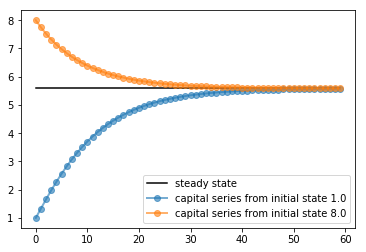

In [17]:
import matplotlib.pyplot as plt

baseline_params = 0.05, 0.25, 0.1, 0.3, 2.0, 1.0         # 上一块定义的Solow模型的参数  n, s, d, α, z, k
s1 = Solow(*baseline_params)                             # The 'splat' operator * breaks up the tuple
s2 = Solow(*baseline_params)                         
s2.k = 8.0                                               # Reset s2.k to make high capital economy  S2 将 参数 k 从1.0 改为8.0
T = 60
fig, ax = plt.subplots()
# Plot the common steady state value of capital
ax.plot([s1.steady_state()]*T, 'k-', label='steady state')            # s1.steady_state() 返回稳态的k值，然后画出平行线。 [k]*T = [k,k,k,...]
# Plot time series for each economy
for s in s1, s2:
    lb = 'capital series from initial state {}'.format(s.k)           # 设置标签内容
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)  # s.generate_sequence(T)返回T期k的收敛路径 画出图中的曲线

ax.legend(loc='lower right')                 # 标签放在右下角
plt.show()                                   # 显示图片

#### Example: A Market<p>Next let&#8217;s write a class for a simple one good market where agents are price takers</p>
<p>The market consists of the following objects:</p>
<ul class="simple">
<li>A linear demand curve $Q = a_d - b_d p$    需求曲线</li>
<li>A linear supply curve $Q = a_z + b_z (p - t)$   供给曲线</li>
</ul>
<p>Here</p>
<ul class="simple">
<li>$p$ is price paid by the consumer,  $Q$ is quantity, and $t$ is a per unit tax</li>
<li>Other symbols are demand and supply parameters</li>
</ul>
<p>The class provides methods to compute various values of interest, including competitive equlibrium price and quantity, tax revenue raised, consumer surplus and producer surplus</p>
<p>Here&#8217;s our implementation</p>
<img src="https://my.yjbys.com/uploads/image/20170203/1486105354247217.jpg">

In [18]:
from __future__ import division
from scipy.integrate import quad

class Market:

    def __init__(self, ad, bd, az, bz, tax):
        """
        Set up market parameters.  All parameters are scalars.  See
        http://quant-econ.net/py/python_oop.html for interpretation.

        """
        self.ad, self.bd, self.az, self.bz, self.tax = ad, bd, az, bz, tax  # 赋值
        if ad < az:
            raise ValueError('Insufficient demand.')                        # 需求小于供给倾向下 返回 ValueError
        
    def price(self):
        "Return equilibrium price"
        return  (self.ad - self.az + self.bz * self.tax) / (self.bd + self.bz)   # 求出 P 值， 过程：联立方程求解
    
    def quantity(self):
        "Compute equilibrium quantity"
        return  self.ad - self.bd * self.price()                            #   根据上面的P 值，带入，求得均衡时的需求量
        
    def consumer_surp(self):
        "Compute consumer surplus"                                          # 计算消费者剩余
        # == Compute area under inverse demand function == #
        integrand = lambda x: (self.ad / self.bd) - (1 / self.bd) * x       # 需求曲线  转为 p = f(q)  得到反需求曲线
        area, error = quad(integrand, 0, self.quantity())                   # 计算【0,均衡值】时的积分  求得需求曲线下的面积
        return area - self.price() * self.quantity()                        # 需求曲线下的面积 - 价格 * 均衡值 = 消费者剩余
    
    def producer_surp(self):
        "Compute producer surplus"
        #  == Compute area above inverse supply curve, excluding tax ==      # 计算生产者剩余
        integrand = lambda x: -(self.az / self.bz) + (1 / self.bz) * x       # 供给曲线  转为 p = f(q)  得到反供给曲线
        area, error = quad(integrand, 0, self.quantity())                    # 求供给曲线下的面积 
        return (self.price() - self.tax) * self.quantity() - area            # p * q - 供给曲线下的面积 = 生产者剩余
    
    def taxrev(self):
        "Compute tax revenue"
        return self.tax * self.quantity()                                    # 计算税收  税率 * 均衡值
        
    def inverse_demand(self, x):
        "Compute inverse demand"
        return self.ad / self.bd - (1 / self.bd)* x                         # 反需求函数
    
    def inverse_supply(self, x):
        "Compute inverse supply curve"
        return -(self.az / self.bz) + (1 / self.bz) * x + self.tax          # 反供给函数
    
    def inverse_supply_no_tax(self, x):
        "Compute inverse supply curve without tax"
        return -(self.az / self.bz) + (1 / self.bz) * x                     # 不包含tax时的反供给函数


In [19]:
baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params)
print("equilibrium price = ", m.price())           # 计算均衡价格

equilibrium price =  18.5


In [20]:
print("consumer surplus = ", m.consumer_surp())    # 消费者剩余

consumer surplus =  33.0625


Here’s a short program that uses this class to plot an inverse demand curve together with inverse supply curves with and without taxes

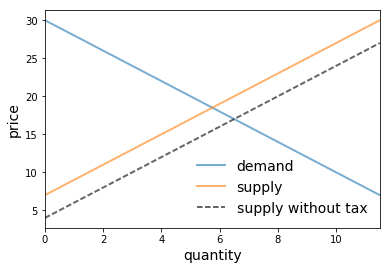

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Baseline ad, bd, az, bz, tax
baseline_params = 15, .5, -2, .5, 3                                   # 赋值
m = Market(*baseline_params) 

q_max = m.quantity() * 2                                              # 设置最大的需求量 为 均衡值的两倍 
q_grid = np.linspace(0.0, q_max, 100)                                 # [0, 最大需求量]  等分设置100个节点
pd = m.inverse_demand(q_grid)                                         # 根据 需求量的节点 根据 反需求函数得到 价格
ps = m.inverse_supply(q_grid)                                         # 根据 需求量的节点 根据 反供给函数得到 价格
psno = m.inverse_supply_no_tax(q_grid)                                # 根据 需求量的节点 根据 无税收情况的反供给函数得到 价格

fig, ax = plt.subplots()
ax.plot(q_grid, pd, lw=2, alpha=0.6, label='demand')                  # 根据 q pd 画图
ax.plot(q_grid, ps, lw=2, alpha=0.6, label='supply')                  # 根据 q ps 画图
ax.plot(q_grid, psno, '--k', lw=2, alpha=0.6, label='supply without tax')  # 根据 q psno 画图
ax.set_xlabel('quantity', fontsize=14)                                # 横轴的标签和字体大小
ax.set_xlim(0, q_max)                                                 # 横轴的范围
ax.set_ylabel('price', fontsize=14)                                   # 纵轴的标签和字体大小
ax.legend(loc='lower right', frameon=False, fontsize=14)              # 标签位置和其他属性
plt.show()                                                            # 显示图片 

The next program provides a function that

- takes an instance of `Market` as a parameter
- computes dead weight loss from the imposition of the tax

In [22]:
def deadw(m):
    "Computes deadweight loss for market m."
    # == Create analogous market with no tax == #
    m_no_tax = Market(m.ad, m.bd, m.az, m.bz, 0)           # 无税收 tax=0 情形下，设置参数
    # == Compare surplus, return difference == #
    surp1 = m_no_tax.consumer_surp() + m_no_tax.producer_surp()     # 无税收情形下 消费者剩余加上生产者剩余
    surp2 = m.consumer_surp() + m.producer_surp() + m.taxrev()      # 税收情形下，消费者剩余加上生产者剩余加上税收
    return surp1 - surp2                                            # 得到 Loss

In [23]:
baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params)
deadw(m)  # Show deadweight loss

1.125

<h3>Example: Chaos<a class="headerlink" href="#example-chaos" title="Permalink to this headline">¶</a></h3>
<p>Let&#8217;s look at one more example, related to chaotic dynamics in nonlinear systems</p>
<p>One simple transition rule that can generate complex dynamics is the logistic map</p>
<div class="math" id="equation-quadmap2">
$x_{t+1} = r x_t(1 - x_t) ,\quad x_0 \in [0, 1],\quad r \in [0, 4]$    
Let's write a class for generating time series from this model  
Here's one implementation, in file <a class="reference external" href="/python_oop/chaos_class.py">chaos_class.py</a>

In [24]:
class Chaos:
    """
    Models the dynamical system with :math:`x_{t+1} = r x_t (1 - x_t)`
    """
    def __init__(self, x0, r):                             # 初始情况下有两个变量
        """
        Initialize with state x0 and parameter r 
        """
        self.x, self.r = x0, r
        
    def update(self):
        "Apply the map to update state."
        self.x =  self.r * self.x *(1 - self.x)          # 这一期产生的结果又返回给x，根据公式
        
    def generate_sequence(self, n):
        "Generate and return a sequence of length n."
        path = []
        for i in range(n):                             # 将N期添加至x的路径中
            path.append(self.x)
            self.update()
        return path

In [25]:
ch = Chaos(0.1, 4.0)     # x0 = 0.1 and r = 0.4
ch.generate_sequence(5)  # First 5 iterates

[0.1, 0.36000000000000004, 0.9216, 0.28901376000000006, 0.8219392261226498]

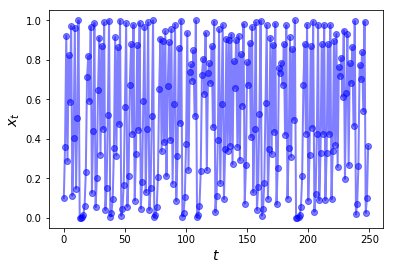

In [26]:
import matplotlib.pyplot as plt

ch = Chaos(0.1, 4.0)                   # 函数和参数
ts_length = 250                        # 时间长度
 
fig, ax = plt.subplots()
ax.set_xlabel(r'$t$', fontsize=14)      # x的标签
ax.set_ylabel(r'$x_t$', fontsize=14)    # y的标签 
x = ch.generate_sequence(ts_length)     # 根据时间产生序列
ax.plot(range(ts_length), x, 'bo-', alpha=0.5, lw=2, label=r'$x_t$')      # 画图
plt.show()

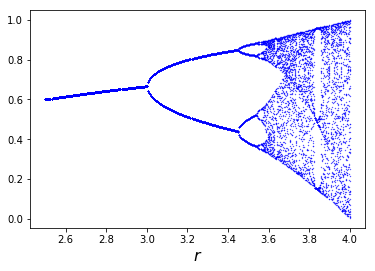

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ch = Chaos(0.1, 4)                 # 函数 和 参数
r = 2.5                            
while r < 4:
    ch.r = r                       # 修改 r值
    t = ch.generate_sequence(1000)[950:]    # 时间设置1000，得到尾部50个点的 xt 值，赋值
    ax.plot([r] * len(t), t, 'b.', ms=0.6)  #  [1]*4 返回 [1,1,1,1].    t有50个值，但是r只有一个，所以需要将其扩展为50个元素
    r = r + 0.005

ax.set_xlabel(r'$r$', fontsize=16)
plt.show()

### 4 Special Methods
Python provides special methods with which some neat tricks can be performed

For example, recall that lists and tuples have a notion of length, and that this length can be queried via the `len` function

In [28]:
x = (10, 20)
len(x)                       # 长度 - 元素个数

2

If you want to provide a return value for the `len` function when applied to your user-defined object, use the `__len__` special methodm

In [29]:
class Foo:                              # 简单的类与对象

    def __len__(self):             
        return 42

In [30]:
f = Foo()
len(f)

42

A special method we will use regularly is the `__call__` method

This method can be used to make your instances callable, just like functions

In [31]:
class Foo:

    def __call__(self, x):
        return x + 42

In [32]:
f = Foo()
f(8)                   # Exactly equivalent to f.__call__(8)

50

### 5 Exercises
#### Exercise 1 实现经验累积分布函数
<p>The <a class="reference external" href="https://en.wikipedia.org/wiki/Empirical_distribution_function">empirical cumulative distribution function (ecdf)</a> corresponding to a sample $\{X_i\}_{i=1}^n$ is defined as</p>　　
$F_n(x) := \frac{1}{n}  \sum_{i=1}^n \mathbf{1}\{X_i \leq x\}　　
 \qquad (x \in \mathbb{R})\qquad\qquad X_i<x$的概率  
$\mathbf{1}\{X_i \leq x\}$ is an indicator function (one if $X_i \leq x$ and zero otherwise)
and hence $F_n(x)$ is the fraction of the sample that falls below $x$
<p>The Glivenko&#8211;Cantelli Theorem states that, provided that the sample is iid, the ecdf $F_n$ converges to the true distribution function $F$</p>
<p>Implement $F_n$ as a class called <code class="docutils literal"><span class="pre">ECDF</span></code>, where</p>
<ul class="simple">
<li>A given sample $\{X_i\}_{i=1}^n$ are the instance data, stored as <code class="docutils literal"><span class="pre">self.observations</span></code></li>
<li>The class implements a <code class="docutils literal"><span class="pre">__call__</span></code> method that returns $F_n(x)$ for any $x$</li>
</ul>
<p>Your code should work as follows (modulo randomness)</p>

In [33]:
class ECDF:

    def __init__(self, observations):
        self.observations = observations            # 随机变量的赋值

    def __call__(self, x):
        counter = 0.0
        for obs in self.observations:
            if obs <= x:
                counter += 1                        # 小于 x 的随机变量个数
        return counter / len(self.observations)    # 小于 x 变量比率

In [34]:
# == test == #

from random import uniform
samples = [uniform(0, 1) for i in range(10)]          # 生成随机数
F = ECDF(samples)                                      # 赋值函数

print(F(0.5))  # Evaluate ecdf at x = 0.5              # 添加属性

F.observations = [uniform(0, 1) for i in range(1000)]

print(F(0.5))

0.6
0.501


In [35]:
from random import uniform

samples = [uniform(0, 1) for i in range(10)]
F = ECDF(samples)
F(0.5)  # Evaluate ecdf at x = 0.5

0.7

In [36]:
F.observations = [uniform(0, 1) for i in range(1000)]
F(0.5)
0.479

0.479

#### Exercise2
In an earlier exercise, you wrote a function for evaluating polynomials

This exercise is an extension, where the task is to build a simple class called Polynomial for representing and manipulating polynomial functions such as
$p(x) = a_0 + a_1 x + a_2 x^2 + \cdots a_N x^N = \sum_{n=0}^N a_n x^n
    \qquad (x \in \mathbb{R}) $  
The instance data for the class `Polynomial` will be the coefficients (in the case of (4), the numbers $a_0,…,a_N$)

Provide methods that

1. Evaluate the polynomial, returning $p(x)$ for any $x$
2. Differentiate the polynomial, replacing the original coefficients with those of its derivative $p′$
Avoid using any` import` statements

In [37]:
class Polynomial:

    def __init__(self, coefficients):
        """
        Creates an instance of the Polynomial class representing

            p(x) = a_0 x^0 + ... + a_N x^N,

        where a_i = coefficients[i].
        """
        self.coefficients = coefficients                   # 系数赋值

    def __call__(self, x):
        "Evaluate the polynomial at x."
        y = 0
        for i, a in enumerate(self.coefficients):         # 按照函数形式写循环
            y += a * x**i
        return y

    def differentiate(self):
        "Reset self.coefficients to those of p' instead of p."
        new_coefficients = []                            # 新的系数是原式的求导后的系数
        for i, a in enumerate(self.coefficients):       # 系数 = [a_1,2a_2,3a_3,...,na_a]
            new_coefficients.append(i * a)
        # Remove the first element, which is zero
        del new_coefficients[0]
        # And reset coefficients data to new values
        self.coefficients = new_coefficients
        return new_coefficients